In [26]:
#Importing the libraries that will be used

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

Loading the Dataset

In [ ]:
data = pd.read_csv('insurance.csv')

#printing the first 5 rows of the data
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


EXPLORATORY DATA ANALYSIS(EDA):

Inspecting the Dataset

In [10]:
#general information about the dataset
print(data.info())

#checking for missing or null values
print(data.isnull().sum())

#checking for duplicates
print(data.duplicated().sum())

#descriptive statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%     

Visualizing the Correlations in the Dataset

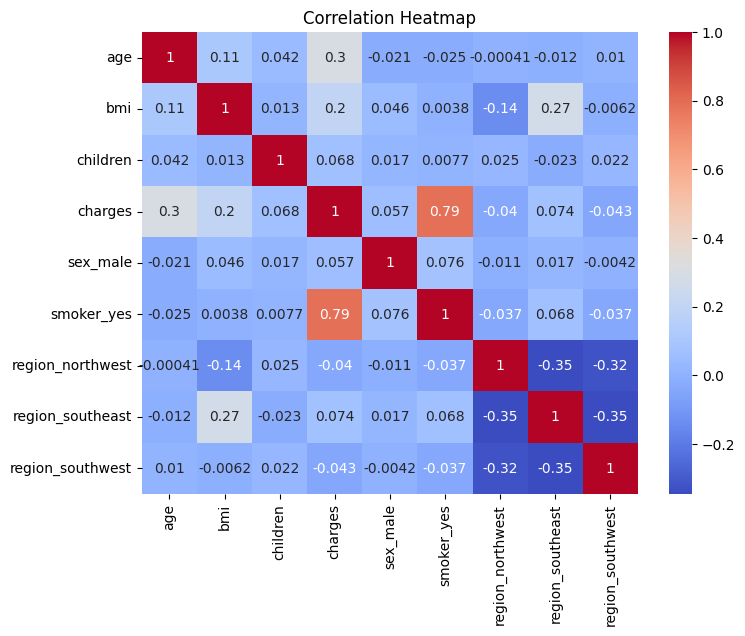

In [13]:
#Getting the Correlation heatmap
plt.figure(figsize=(8,6))
data=pd.get_dummies(data, drop_first=True)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Setting up the Plot Target Distribution

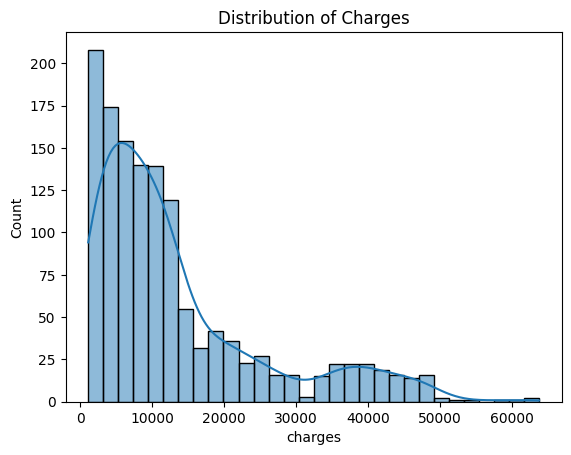

In [14]:
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

Analyzing Categorical variables

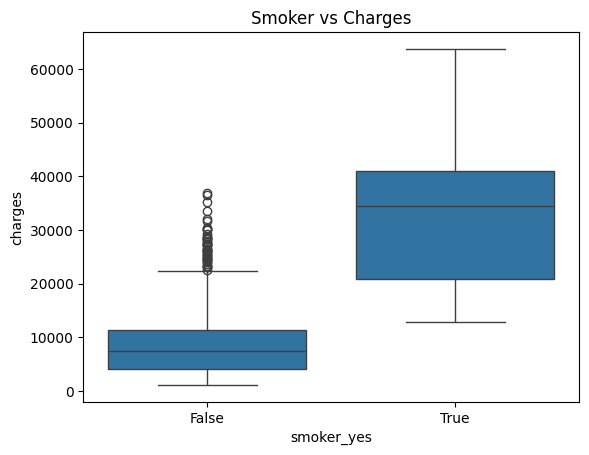

In [15]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoking Status')
plt.show()

DATA PREPROCESSING

In [16]:
x=data.drop('charges', axis=1) #Features

y=data['charges'] #Target

In [33]:

from sklearn.exceptions import NotFittedError

# One Hot Encoding for the categorical variables
categorical_features = ["sex_male", "smoker_yes", "region_northwest", "region_southeast", "region_southwest"]
numerical_features = ["age", "bmi", "children"]

# Preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Assuming 'data' is your DataFrame
# Print the columns in data
print("Columns in data:", data.columns)

# Fit the preprocessor
try:
    preprocessor.fit(data)
    print("Preprocessor fitted successfully.")
except NotFittedError as e:
    print(f"Error fitting preprocessor: {e}")

# Applying the transformation
x = preprocessor.transform(data)
print("Transformation applied successfully.")

Columns in data: Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')
Preprocessor fitted successfully.
Transformation applied successfully.


Spliting the Data into Training and Testing sets
 

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Creating the Regression Model

In [36]:
#defining the model
lin_reg = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

#training the model
lin_reg.fit(pd.DataFrame(x_train, columns=data.columns.drop('charges')), y_train)

#predicting
y_pred = lin_reg.predict(pd.DataFrame(x_test, columns=data.columns.drop('charges')))

#Evaluating the model
print("Linear Regression:")
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Linear Regression:
Mean Squared Error: 33596915.85136148
R2 Score: 0.7835929767120722


Random Forest Regressor

In [37]:
#Defining the model
rf_reg = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

#train the model
rf_reg.fit(pd.DataFrame(x_train, columns=data.columns.drop('charges')), y_train)

#predictions
y_pred = rf_reg.predict(pd.DataFrame(x_test, columns=data.columns.drop('charges')))

#evaluating the model
print("Random Forest Regressor:")
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Random Forest Regressor:
Mean Squared Error: 20864569.513376206
R2 Score: 0.8656055394920775


Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [10, 20, None]
}

# Define the grid search
grid_search = GridSearchCV(rf_reg, param_grid, cv=3, scoring="r2", verbose=2) # cv=5 is the number of folds for cross-validation
grid_search.fit(pd.DataFrame(x_train, columns=data.columns.drop('charges')), y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=10, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__n_estimators=100; total time=   1.2s
[CV] END regressor__max_depth=10, regressor__n_estimators=100; total time=   0.5s
[CV] END regressor__max_depth=10, regressor__n_estimators=150; total time=   0.8s
[CV] END regressor__max_depth=10, regressor__n_estimators=150; total time=   0.6s
[CV] END regressor__max_depth=10, regressor__n_estimators=150; total time=   0.5s
[CV] END regressor__max_depth=20, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=20, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=20, regressor

Evaluating and Interpreting the Model

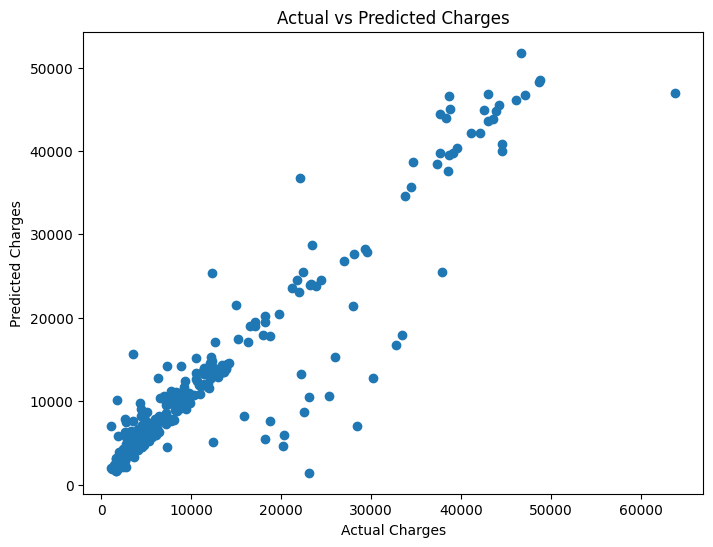

In [41]:
#plotting actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

Feature importance For Random Forest

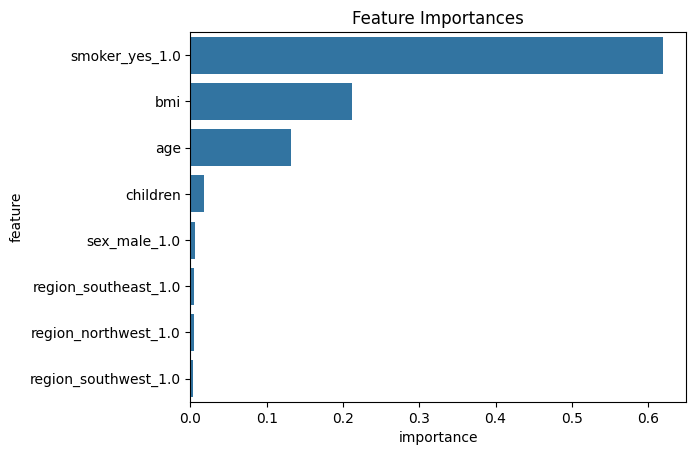

In [43]:
#extracting feature importances
rf_model = grid_search.best_estimator_.named_steps['regressor']
feature_importances = rf_model.feature_importances_

#visualizing feature importances
features = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

saving

In [44]:
import joblib

#save the pipeline
joblib.dump(grid_search.best_estimator_, 'Healthcare_Costs_Prediction_model.pkl')

['Healthcare_Costs_Prediction_model.pkl']

In [45]:
loaded_model = joblib.load('Healthcare_Costs_Prediction_model.pkl')